In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


import warnings
warnings.filterwarnings('ignore')


In [18]:
games=pd.read_csv('/home/harish/ML deco/games.csv')

In [19]:
games.head()

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,12333,boardgame,Twilight Struggle,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,120677,boardgame,Terra Mystica,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,102794,boardgame,Caverna: The Cave Farmers,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,25613,boardgame,Through the Ages: A Story of Civilization,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,3076,boardgame,Puerto Rico,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943


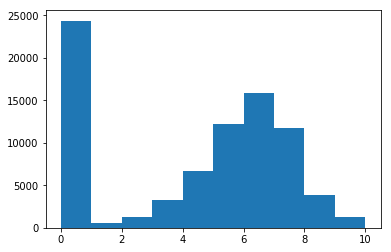

In [20]:
plt.hist(games["average_rating"])

plt.show()

In [21]:
print(games[games["average_rating"]==0].iloc[0])

id                             318
type                     boardgame
name                    Looney Leo
yearpublished                    0
minplayers                       0
maxplayers                       0
playingtime                      0
minplaytime                      0
maxplaytime                      0
minage                           0
users_rated                      0
average_rating                   0
bayes_average_rating             0
total_owners                     0
total_traders                    0
total_wanters                    0
total_wishers                    1
total_comments                   0
total_weights                    0
average_weight                   0
Name: 13048, dtype: object


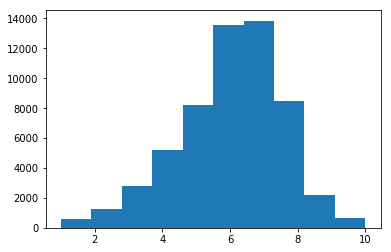

In [60]:
games=games[games["average_rating"]>0]

games=games.dropna(axis=0)

plt.hist(games["average_rating"])

plt.show()

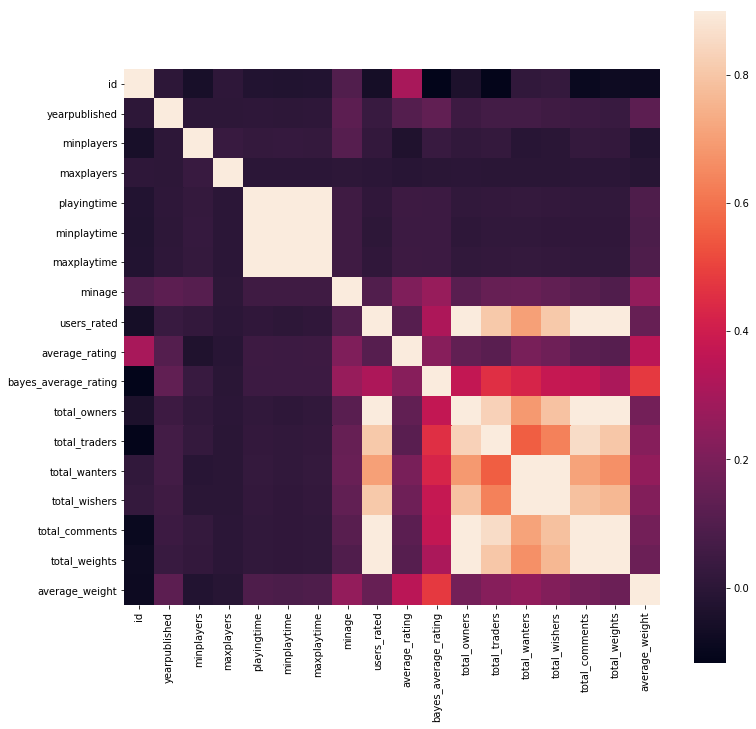

In [61]:
#correlation matrix

corremat=games.corr()

plt.figure(figsize=(12,12))


sns.heatmap(corremat,vmax=0.9,square=True)

In [62]:
columns=games.columns.tolist()

columns=[c for c in columns if c not in ["bayes_average_rating","average_rating","name","type","id"]]

target="average_rating"

In [68]:
train=games.sample(frac=0.8,random_state=2)

test=games.loc[~games.index.isin(train.index)]

print(train.shape)
print(test.shape)

(45515, 20)
(11379, 20)


In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr=LinearRegression()

lr.fit(train[columns],train[target])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [70]:
predictions=lr.predict(test[columns])

mean_squared_error(predictions,test[target])

2.069972906804763

In [76]:
from sklearn.ensemble import RandomForestRegressor

rfr=RandomForestRegressor(n_estimators=100, min_samples_leaf=10, random_state=2)

rfr.fit(train[columns],train[target])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=2, verbose=0, warm_start=False)

In [80]:
predictions=rfr.predict(test[columns])

mean_squared_error(predictions,test[target])

1.4263376611971759

In [87]:
#take an example and see

predict_lr=lr.predict(test[columns].iloc[1].values.reshape(1,-1))
predict_rfr=rfr.predict(test[columns].iloc[1].values.reshape(1,-1))
print(test[target].iloc[1])
print(predict_lr)
print(predict_rfr)


8.350439999999999
[9.18494368]
[7.99075115]
